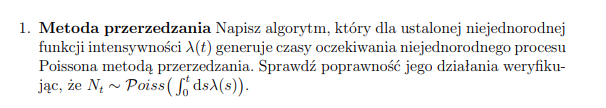

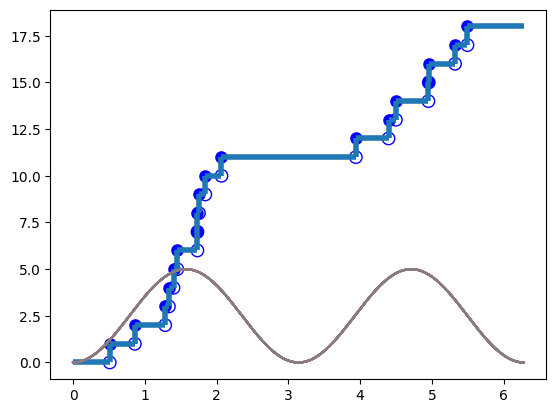

In [62]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def niejednorodny_proces_poissona(lambda_func, T):
    lambda2 = scipy.integrate.quad(lambda_func, 0, T)[0]
    k = np.random.poisson(lambda2)
    xs = np.linspace(0, T, 1000)
    M = max(lambda_func(xs))

    skoki = []

    while len(skoki) < k:
        ux = np.random.uniform(0, T)
        uy = np.random.uniform(0, M)
        if uy < lambda_func(ux):
            skoki.append(ux)
            continue
        else:
            continue

    skoki.sort()
    return skoki

lambda1 = lambda t: 5*np.sin(t)**2
T = 2*np.pi
skoki = niejednorodny_proces_poissona(lambda1, T)
x_i = [0]
y_i = [0]
xs = np.linspace(0, T, 1000)
for i in range(len(skoki)):
    x_i.append(skoki[i])
    y_i.append(y_i[-1] + 1)

    plt.vlines(x=x_i[-1], ymin=y_i[-1] - 1, ymax=y_i[-1], linestyles='dashed', linewidth=4)
    plt.hlines(y=y_i[-2], xmin=x_i[-2], xmax=x_i[-1], linewidth=4)
    plt.scatter(x=[x_i[-1]], y=[y_i[-2]], facecolors='none', edgecolors='b', s=80)
    plt.scatter(x=[x_i[-1]], y=[y_i[-1]], c='b', s=65)
    plt.plot(xs, lambda1(xs))

plt.hlines(y=y_i[-1], xmin=x_i[-1], xmax=T, linewidth=4)

plt.show()

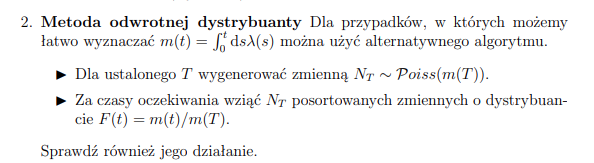

In [72]:
from scipy.interpolate import interp1d
T1 = 2*np.pi
lambda_func = lambda t: 5*np.sin(t)**2
n = 1000 #liczba punktów do szacowania funkcji odwrotnej

def niejednorodny_p_pois_odwrotna_dys(lambda_func, T, n):
    m_T = scipy.integrate.quad(lambda_func, 0, T)[0]
    N_t = np.random.poisson(m_T)
    ts = np.linspace(0,T1,n)
    m_values = [scipy.integrate.quad(lambda_func, 0, t)[0] for t in ts]
    m_inv = interp1d(m_values, ts)
    Ts = np.zeros(N_t)
    for i in range(N_t):
        u = np.random.rand()
        Ts[i] = m_inv(m_T * u)
    Ts.sort()
    return Ts



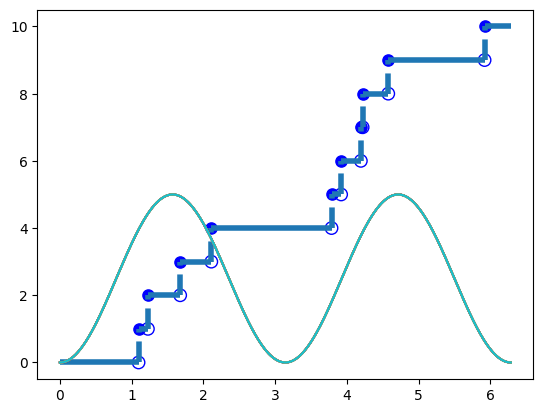

In [80]:
Ts = niejednorodny_p_pois_odwrotna_dys(lambda_func, T1,n)
x_i = [0]
y_i = [0]
ts = np.linspace(0,T1,n)
for i in range(len(Ts)):
    x_i.append(Ts[i])
    y_i.append(y_i[-1] + 1)
    plt.vlines(x=x_i[-1], ymin=y_i[-1] - 1, ymax=y_i[-1], linestyles='dashed', linewidth=4)
    plt.hlines(y=y_i[-2], xmin=x_i[-2], xmax=x_i[-1], linewidth=4)
    plt.scatter(x=[x_i[-1]], y=[y_i[-2]], facecolors='none', edgecolors='b', s=80)
    plt.scatter(x=[x_i[-1]], y=[y_i[-1]], c='b', s=65)
    plt.plot(ts, lambda_func(ts))

plt.hlines(y=y_i[-1], xmin=x_i[-1], xmax=T1, linewidth=4)

plt.show()

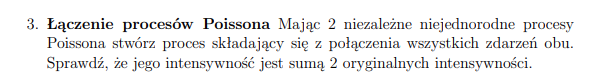

In [ ]:
lambda_func1 = lambda t: 5*np.sin(t)**2
lambda_func2 = lambda t: np.cos(t)**2
T_1, T_2 = 2*np.pi, 2*np.pi
Ts1, Ts2 = niejednorodny_p_pois_odwrotna_dys(lambda_func1, T_1, n), niejednorodny_p_pois_odwrotna_dys(lambda_func2, T_2, n)